# Задание 9.11. Модуль 13 (HW-01)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

In [3]:
plt.style.use('default')

In [4]:
churn_data = pd.read_csv('data/churn.csv') # Прочитаем csv-файл
churn_data.head() # Выведем первые пять строк таблицы

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:  
 
RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)  
CustomerId — идентификатор клиента  
Surname — фамилия клиента  
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)  
Geography — страна клиента (банк международный)  
Gender — пол клиента  
Age — возраст клиента  
Tenure — сколько лет клиент пользуется услугами банка  
Balance — баланс на счетах клиента в банке  
NumOfProducts — количество услуг банка, которые приобрёл клиент  
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)  
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)  
EstimatedSalary — предполагаемая заработная плата клиента  
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [5]:
churn_data = churn_data.drop(['RowNumber'], axis=1) # Удаляем ненужный столбец 
#churn_data.head() # Выведем первые пять строк таблицы


In [6]:
churn_data.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# ЗАДАНИЯ

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению. 

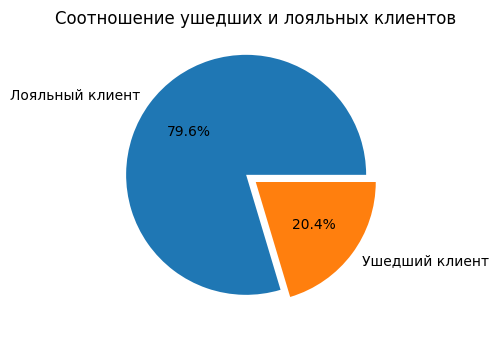

In [7]:
# Находим частоту ушедших и лоялных клиентов
exited_data = churn_data['Exited'].value_counts()

# Здаём 'имена' в место 1 и 0 со столбца Exited
labels = 'Лояльный клиент', 'Ушедший клиент' 

# Для сровнения соотношение ушедших и лояльных клиентов создаём круговую диаграмму
fig = plt.figure(figsize=(3, 3)) 
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_data,
    labels=labels,
    autopct='%.1f%%',
    explode = [0.1, 0]
)

axes.set_title('Соотношение ушедших и лояльных клиентов');

**Вывод:** Как видно с круговой диаграммы соотношение ушедших и лояльных клиентов составляет один к пяти! То есть каждый 5 клиент банка уходит! 

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

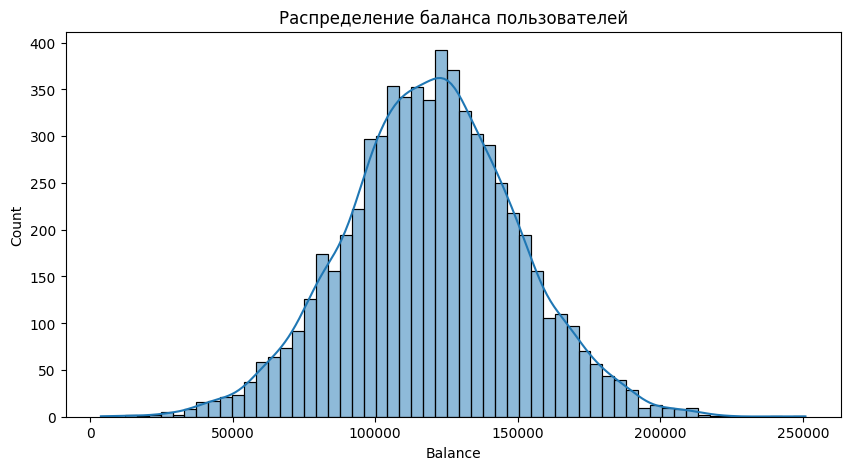

In [8]:
# Филтруем таблицу
balance_data = churn_data[churn_data['Balance'] > 2500]

fig = plt.figure(figsize=(10, 5))

histplot_balance = sns.histplot(
    data=balance_data,
    x='Balance',
    kde=True
)

histplot_balance.set_title('Распределение баланса пользователей');

**Вывод:** Как видно с графика у большенства клиентов сумма на считу лежит в дипазоне от 75000 до 165000 долларов, мало считов меньше 35000 и больше 195000! Из этого можно сделать вывод что оснавная масса клиентов баека это средный класс!

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [9]:
# Копируем таблицу
balance_data2 = balance_data.copy() 

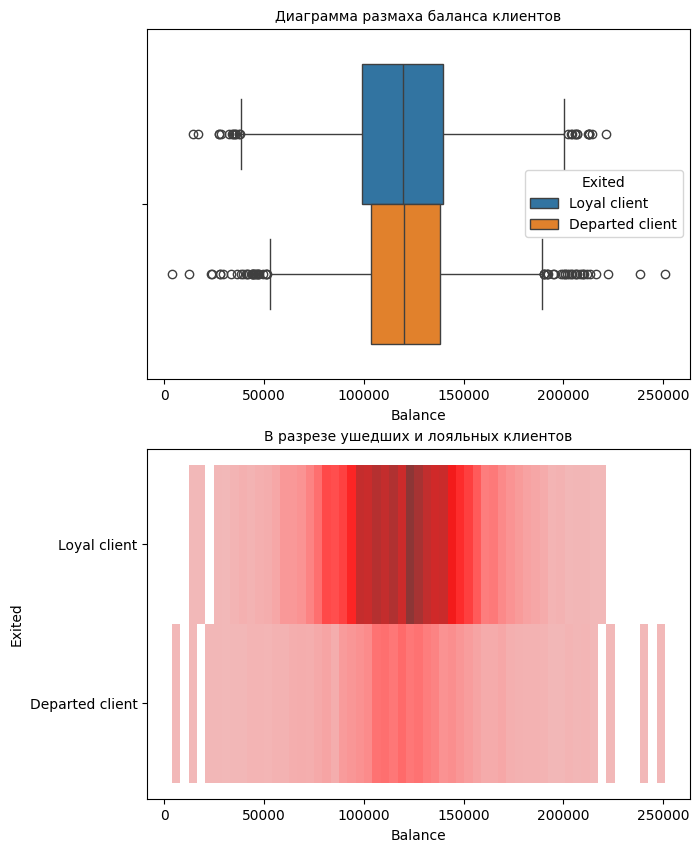

In [10]:
# Переводим в котегориальный тип
balance_data2['Exited'] = balance_data2['Exited'].astype('category') 
# Переименуем значения
balance_data2['Exited'] = balance_data2['Exited'].cat.rename_categories({
    1 : 'Departed client',
    0 : 'Loyal client'
}) 
# Создаем дополнительные системы координат с каробчитой диаграммой и гистагрмой
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 10))

sns.boxplot(
    data=balance_data2,
    x='Balance',
    hue='Exited',
    ax=axes[0]
);
axes[0].set_title('Диаграмма размаха баланса клиентов', fontsize=10)
sns.histplot(
    data=balance_data2,
    x='Balance',
    y='Exited',
    #bins=25,
    color='red',
    ax=axes[1]
);
axes[1].set_title('В разрезе ушедших и лояльных клиентов', fontsize=10);

**Вывод** В диограмме размаха мы видим проктически одинаковую кортину и у лоялных и у ушедших клиентов а в разрезе видно, что где у лоялных клиентов темные полосы у ушедшых наоборот светлые полосы это может быть от того, что разные проценты на разные суммы!

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

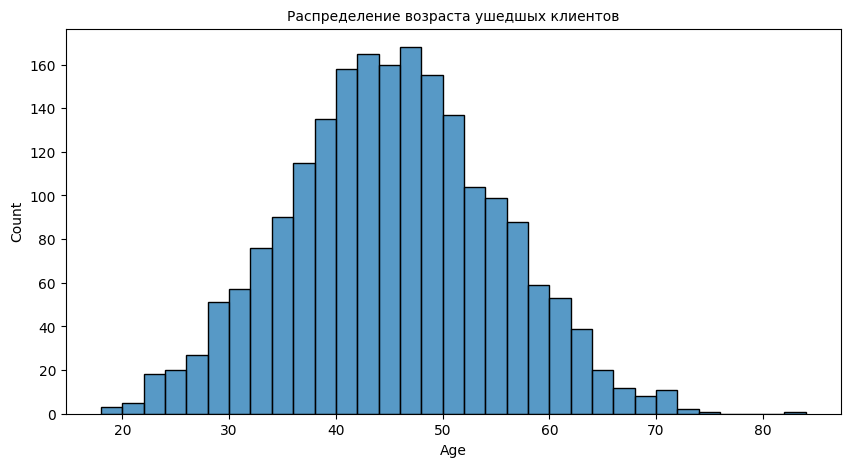

In [11]:
# Филтруем данные
departed_client = churn_data[churn_data['Exited'] == 1]
# Создаём гистаграму
fig = plt.figure(figsize=(10, 5))
departed = sns.histplot(
    data=departed_client,
    x='Age',
);
departed.set_title('Распределение возраста ушедшых клиентов', fontsize=10);

**Вывод** С гистограммы видно вбросы возростной группе 73 и 83 года! советую обротить внимание на средную возрастную группу особено в глаза бросается группа 40 - 50 лет!

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

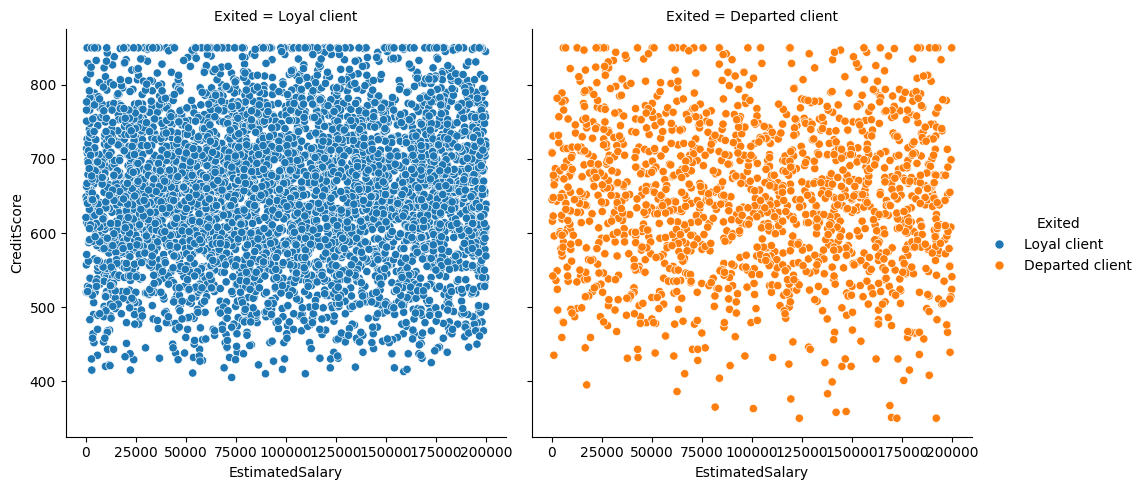

In [12]:
# Создаём диограмму рассеиния 
sns.relplot(
    data=balance_data2,
    x="EstimatedSalary",
    y="CreditScore",
    col="Exited",
    hue="Exited",
    kind="scatter",
);

**Вывод** Как видим из диограмм особой связи нет между кредитним рейтингом и претпологаемой зарплатой!

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

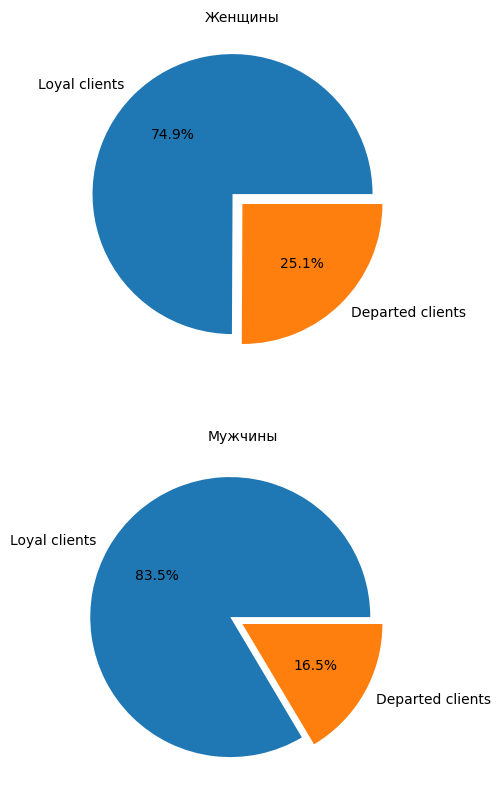

In [13]:
# Филтриуем данные одновременно 
female_data = churn_data[churn_data['Gender'] == 'Female']['Exited'].value_counts()
male_data = churn_data[churn_data['Gender'] == 'Male']['Exited'].value_counts()
# Создаем дополнительные системы координат с круговими диограммоми
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 10)) 
labels= "Loyal clients", "Departed clients"
axes[0].pie(
    female_data,
    labels=labels,
    autopct='%.1f%%',
    explode = [0.1, 0]
);
axes[0].set_title('Женщины', fontsize=10)
axes[1].pie(
    male_data,
    labels=labels,
    autopct='%.1f%%',
    explode = [0.1, 0]
);
axes[1].set_title('Мужчины', fontsize=10);

**Вывод** Как видно с графика працент ушедшых женщин выше чем у мужчин сотвецвено чаще уходят женщины!

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

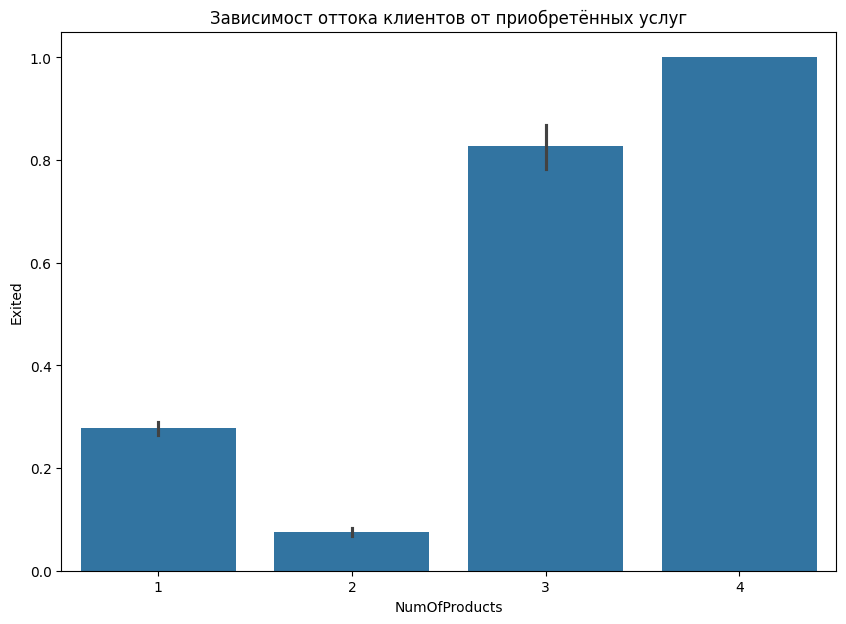

In [14]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Exited',
)
barplot.set_title('Зависимост оттока клиентов от приобретённых услуг');

**Вывод** В оси ординат (*Exited*) 0 у нас лоялные а 1 ушедшие клиенты! Диограмма показывает что болше ушедшых клиентов среди тех кто получи 3 и 4 услуги банка а среди лоялных тек кто получил 2 услуги! 

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [15]:
churn_data2 = churn_data.copy()

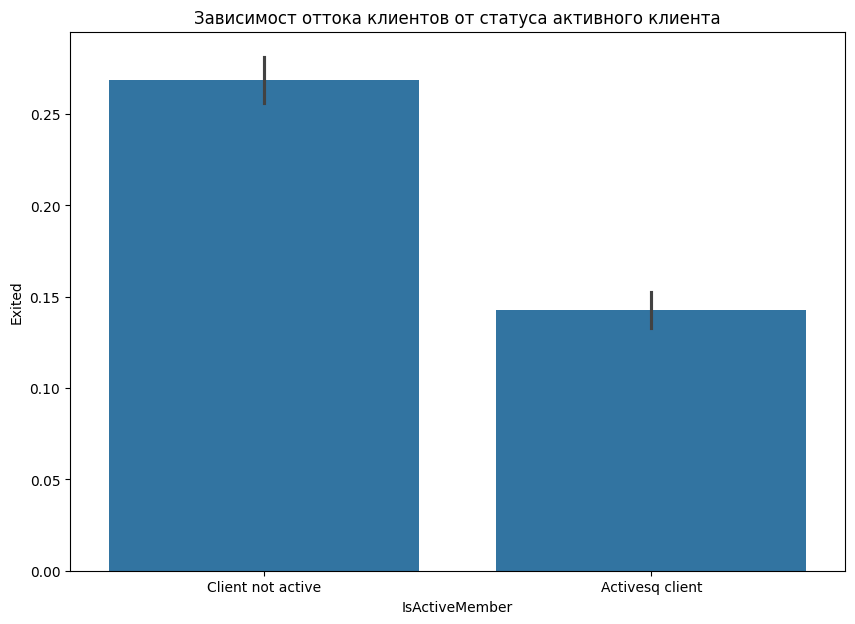

In [16]:
churn_data2['IsActiveMember'] = churn_data2['IsActiveMember'].astype('category')
churn_data2['IsActiveMember'] = churn_data2['IsActiveMember'].cat.rename_categories({
    1 : 'Activesq client',
    0 : 'Client not active'
})

fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data2,
    x='IsActiveMember',
    y='Exited',
)
barplot.set_title('Зависимост оттока клиентов от статуса активного клиента');

**Вывод** Графика показывает, что чаще уходят не активные клиенты! Взяв в расчёт и предыдуйщий график банку можно по советовать политику предоставлению услуг!

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [23]:
churn_countryes = churn_data.groupby(['Geography'])[['Exited']].mean()

fig = px.choropleth(
    data_frame=churn_countryes, 
    locations=churn_countryes.index, 
    locationmode = "country names", 
    color="Exited", 
    range_color=[0, 0.35],
    title='Соотношение ушедшых клиентов по странам',
    width=600, 
    height=500,
    color_continuous_scale='Plotly3' 
)

fig.show()

**Вывод** Как видно на карте большой отток клиентов в Германии! Можно предположит, связено это с тем, что в Германии есть канкурент с болие выгодними условиями для клиентов! 

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [18]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [24]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

summary_table = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    fill_value=1
)


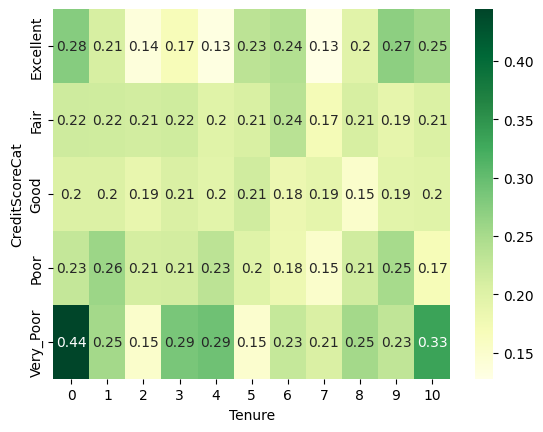

In [20]:
sns.heatmap(data=summary_table, cmap='YlGn', annot=True);


**Вывод** Чаще всего уходят клиенты менше года пользуются услугами банка с ниским рейтингом!